# **TASK 5 - To Explore Business Analytics**

**Performing 'Exploratory Data Analysis' on the provided dataset 'Samplesuperstore'**

**Importing necessary Libraries for the task**

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib
matplotlib.use("Agg")
import matplotlib.pyplot as plt
%matplotlib inline


**Importing the data**

In [9]:
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [10]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [11]:
data.shape

(9994, 13)

In [12]:
# Data Description
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [13]:
data.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [14]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [15]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [16]:
#Preprocessing data
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [17]:
data['Region'].value_counts()

West       3203
East       2848
Central    2323
South      1620
Name: Region, dtype: int64

In [18]:
data.duplicated().sum()

17

In [19]:
#Dropping useless Columns
data=data.drop(['Postal Code'],axis=1)
data=data.drop(['Country'],axis=1)

In [20]:
#Correlation among each other
data.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


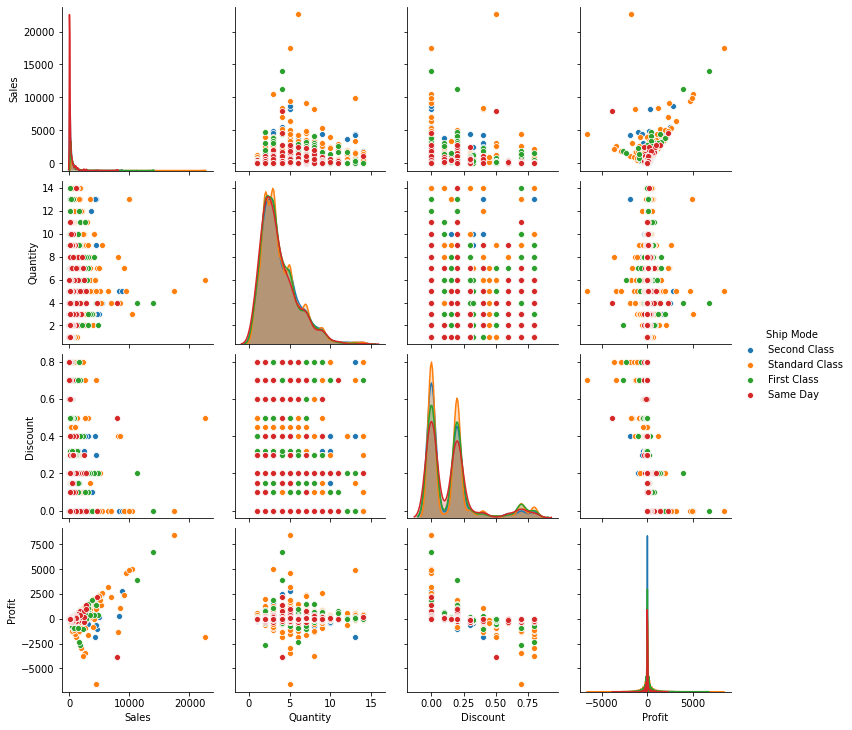

In [21]:
sns.pairplot(data, hue="Ship Mode")

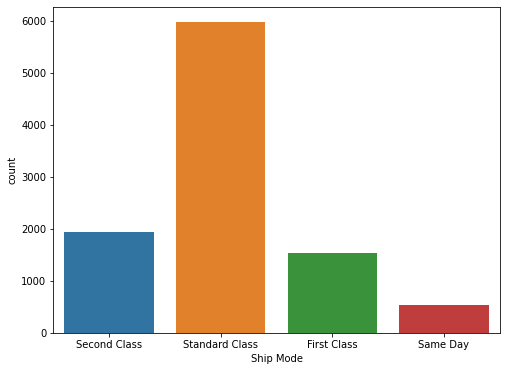

In [22]:
#Analysis of shipping mode
plt.figure(figsize=(8,6))
sns.countplot(x=data['Ship Mode'])
plt.show()

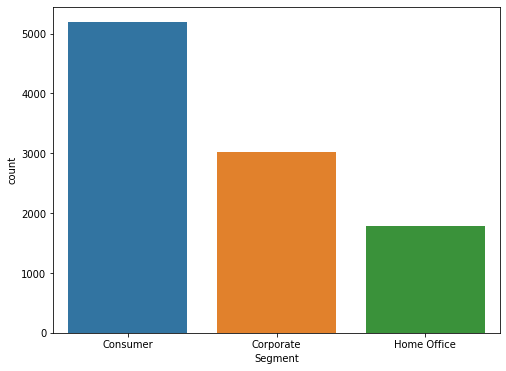

In [23]:
#Analysis of Segments
plt.figure(figsize=(8,6))
sns.countplot(x=data['Segment'])
plt.show()

In [24]:
data['City'].value_counts()

New York City    915
Los Angeles      747
Philadelphia     537
San Francisco    510
Seattle          428
                ... 
Holyoke            1
Grand Island       1
Linden             1
Atlantic City      1
Antioch            1
Name: City, Length: 531, dtype: int64

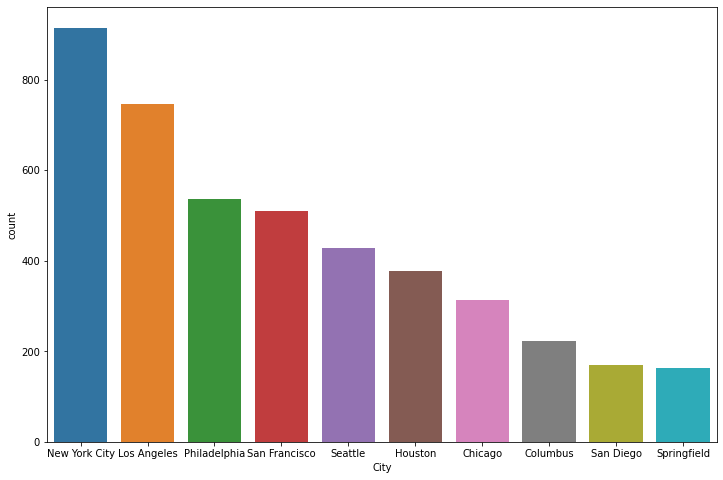

In [25]:
plt.figure(figsize=(12,8))
sns.countplot(x=data['City'],order=(data["City"].value_counts().head(10)).index)
plt.show()

In [27]:
#Grouping by Quantity of Cities
dftop10 = data.groupby('City')['Quantity'].sum().reset_index().sort_values(by='Quantity',ascending=True)
dftop10

,City,Quantity
386,Port Orange,1
259,Littleton,1
257,Lindenhurst,1
140,Elyria,1
213,Iowa City,1
...,...,...
452,Seattle,1590
438,San Francisco,1935
374,Philadelphia,1981
266,Los Angeles,2879


In [28]:
#Most ordering cities
dftop10 = dftop10.head(10)
dftop10.reset_index(drop=True,inplace=True)
dftop10

,City,Quantity
0,Port Orange,1
1,Littleton,1
2,Lindenhurst,1
3,Elyria,1
4,Iowa City,1
5,Jupiter,1
6,Keller,2
7,Grand Island,2
8,Baytown,2
9,Holyoke,2


Text(0, 0.5, 'Quantities ordered')

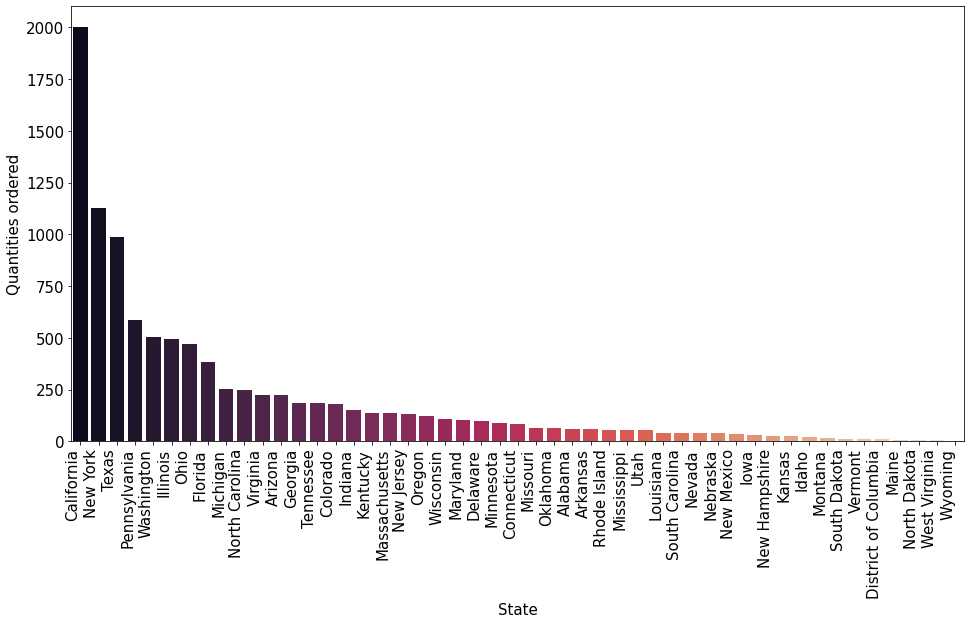

In [41]:
#Locationwise analysis
plt.figure(figsize = (16, 8))
sns.countplot(x = data['State'],palette = 'rocket', order = (data['State'].value_counts().head(50)).index)
plt.xticks(rotation=90,ha='right',fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('State',fontsize=15)
plt.ylabel('Quantities ordered',fontsize=15)

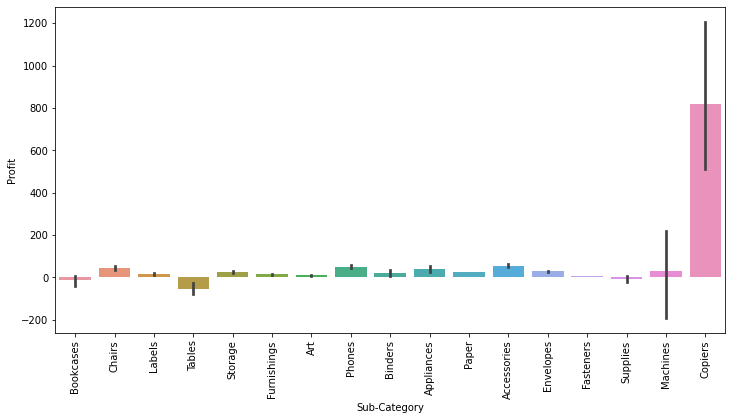

In [34]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['Sub-Category'], y=data['Profit'])
plt.xticks(rotation=90)
plt.show()

Text(-4.575000000000003, 0.5, 'Profit')

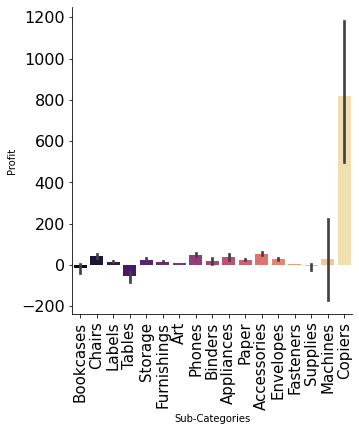

In [39]:

sns.catplot('Sub-Category','Profit',data=data,kind='bar',palette='magma')
plt.xticks(rotation=90,size=15)
plt.yticks(size=16)
plt.xlabel('Sub-Categories')
plt.ylabel('Profit')

# **TASK-5 Completed!!**

##     **Thank you!!**